In [126]:
# Importing required header files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import explained_variance_score
import warnings
warnings.filterwarnings('ignore')

In [127]:
# Data collection and Description

df = pd.read_csv("medicalpremium.csv")
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [35]:
# Checking for Null values

df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [36]:
# Checking data types of all attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


Text(0.5, 1.0, 'Distribution of Age')

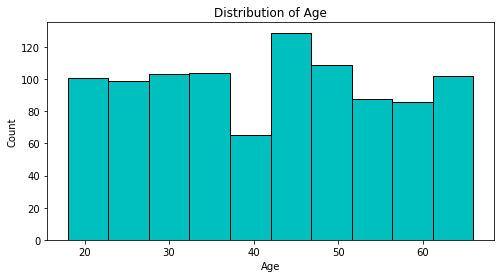

In [37]:
# Distribution of column Age

plt.figure(figsize=(8, 4))
plt.hist(df.Age, color='c', edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Diabetes')

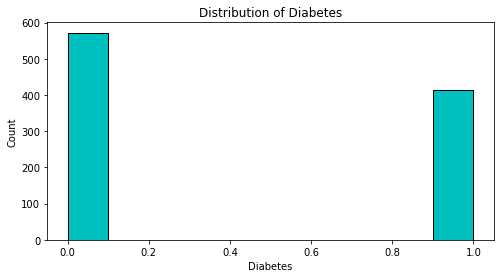

In [38]:
# Distribution of column Diabetes

plt.figure(figsize=(8, 4))
plt.hist(df.Diabetes, color='c', edgecolor='k')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Distribution of Diabetes')

Text(0.5, 1.0, 'Distribution of BloodPressureProblems')

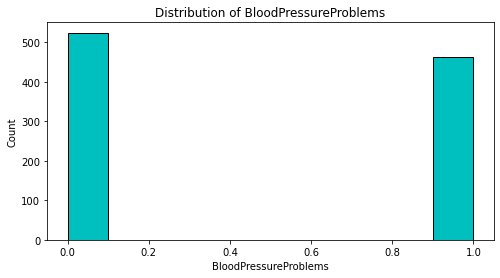

In [39]:
# Distribution of column BloodPressureProblems

plt.figure(figsize=(8, 4))
plt.hist(df.BloodPressureProblems, color='c', edgecolor='k')
plt.xlabel('BloodPressureProblems')
plt.ylabel('Count')
plt.title('Distribution of BloodPressureProblems')

Text(0.5, 1.0, 'Distribution of AnyTransplants')

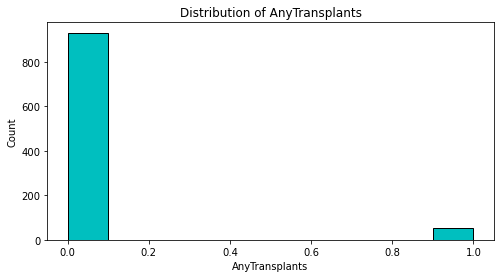

In [40]:
# Distribution of column AnyTransplants

plt.figure(figsize=(8, 4))
plt.hist(df.AnyTransplants, color='c', edgecolor='k')
plt.xlabel('AnyTransplants')
plt.ylabel('Count')
plt.title('Distribution of AnyTransplants')

Text(0.5, 1.0, 'Distribution of AnyChronicDiseases')

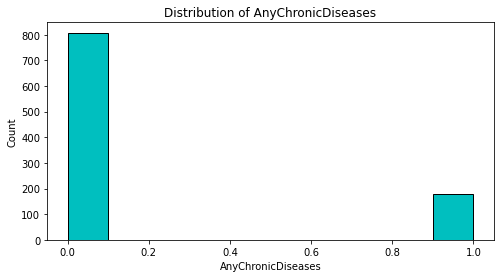

In [41]:
# Distribution of column AnyChronicDiseases

plt.figure(figsize=(8, 4))
plt.hist(df.AnyChronicDiseases, color='c', edgecolor='k')
plt.xlabel('AnyChronicDiseases')
plt.ylabel('Count')
plt.title('Distribution of AnyChronicDiseases')

Text(0.5, 1.0, 'Distribution of Height')

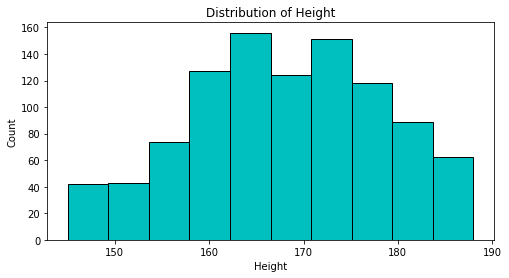

In [42]:
# Distribution of column Height

plt.figure(figsize=(8, 4))
plt.hist(df.Height, color='c', edgecolor='k')
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Distribution of Height')

Text(0.5, 1.0, 'Distribution of Weight')

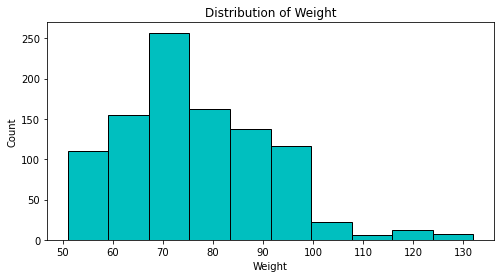

In [43]:
# Distribution of column Weight

plt.figure(figsize=(8, 4))
plt.hist(df.Weight, color='c', edgecolor='k')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Distribution of Weight')

Text(0.5, 1.0, 'Distribution of KnownAllergies')

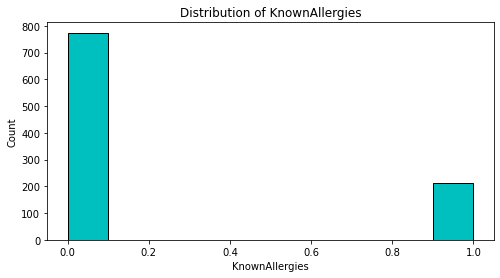

In [44]:
# Distribution of column KnownAllergies

plt.figure(figsize=(8, 4))
plt.hist(df.KnownAllergies, color='c', edgecolor='k')
plt.xlabel('KnownAllergies')
plt.ylabel('Count')
plt.title('Distribution of KnownAllergies')

Text(0.5, 1.0, 'Distribution of HistoryOfCancerInFamily')

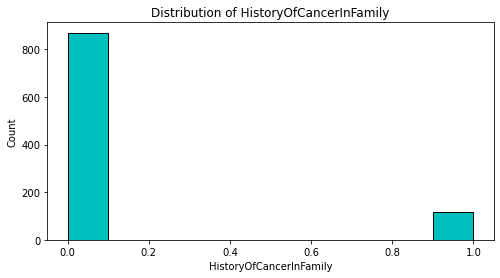

In [45]:
# Distribution of column HistoryOfCancerInFamily

plt.figure(figsize=(8, 4))
plt.hist(df.HistoryOfCancerInFamily, color='c', edgecolor='k')
plt.xlabel('HistoryOfCancerInFamily')
plt.ylabel('Count')
plt.title('Distribution of HistoryOfCancerInFamily')

Text(0.5, 1.0, 'Distribution of NumberOfMajorSurgeries')

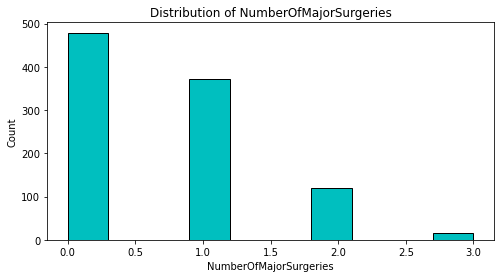

In [46]:
# Distribution of column NumberOfMajorSurgeries

plt.figure(figsize=(8, 4))
plt.hist(df.NumberOfMajorSurgeries, color='c', edgecolor='k')
plt.xlabel('NumberOfMajorSurgeries')
plt.ylabel('Count')
plt.title('Distribution of NumberOfMajorSurgeries')

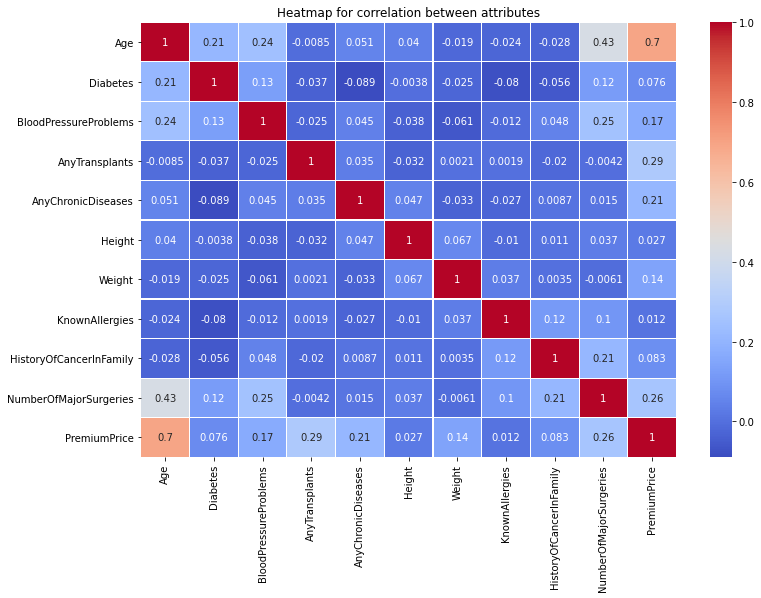

In [47]:
# Correlation Heatmap of the data

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.1)
plt.title("Heatmap for correlation between attributes")
plt.show()

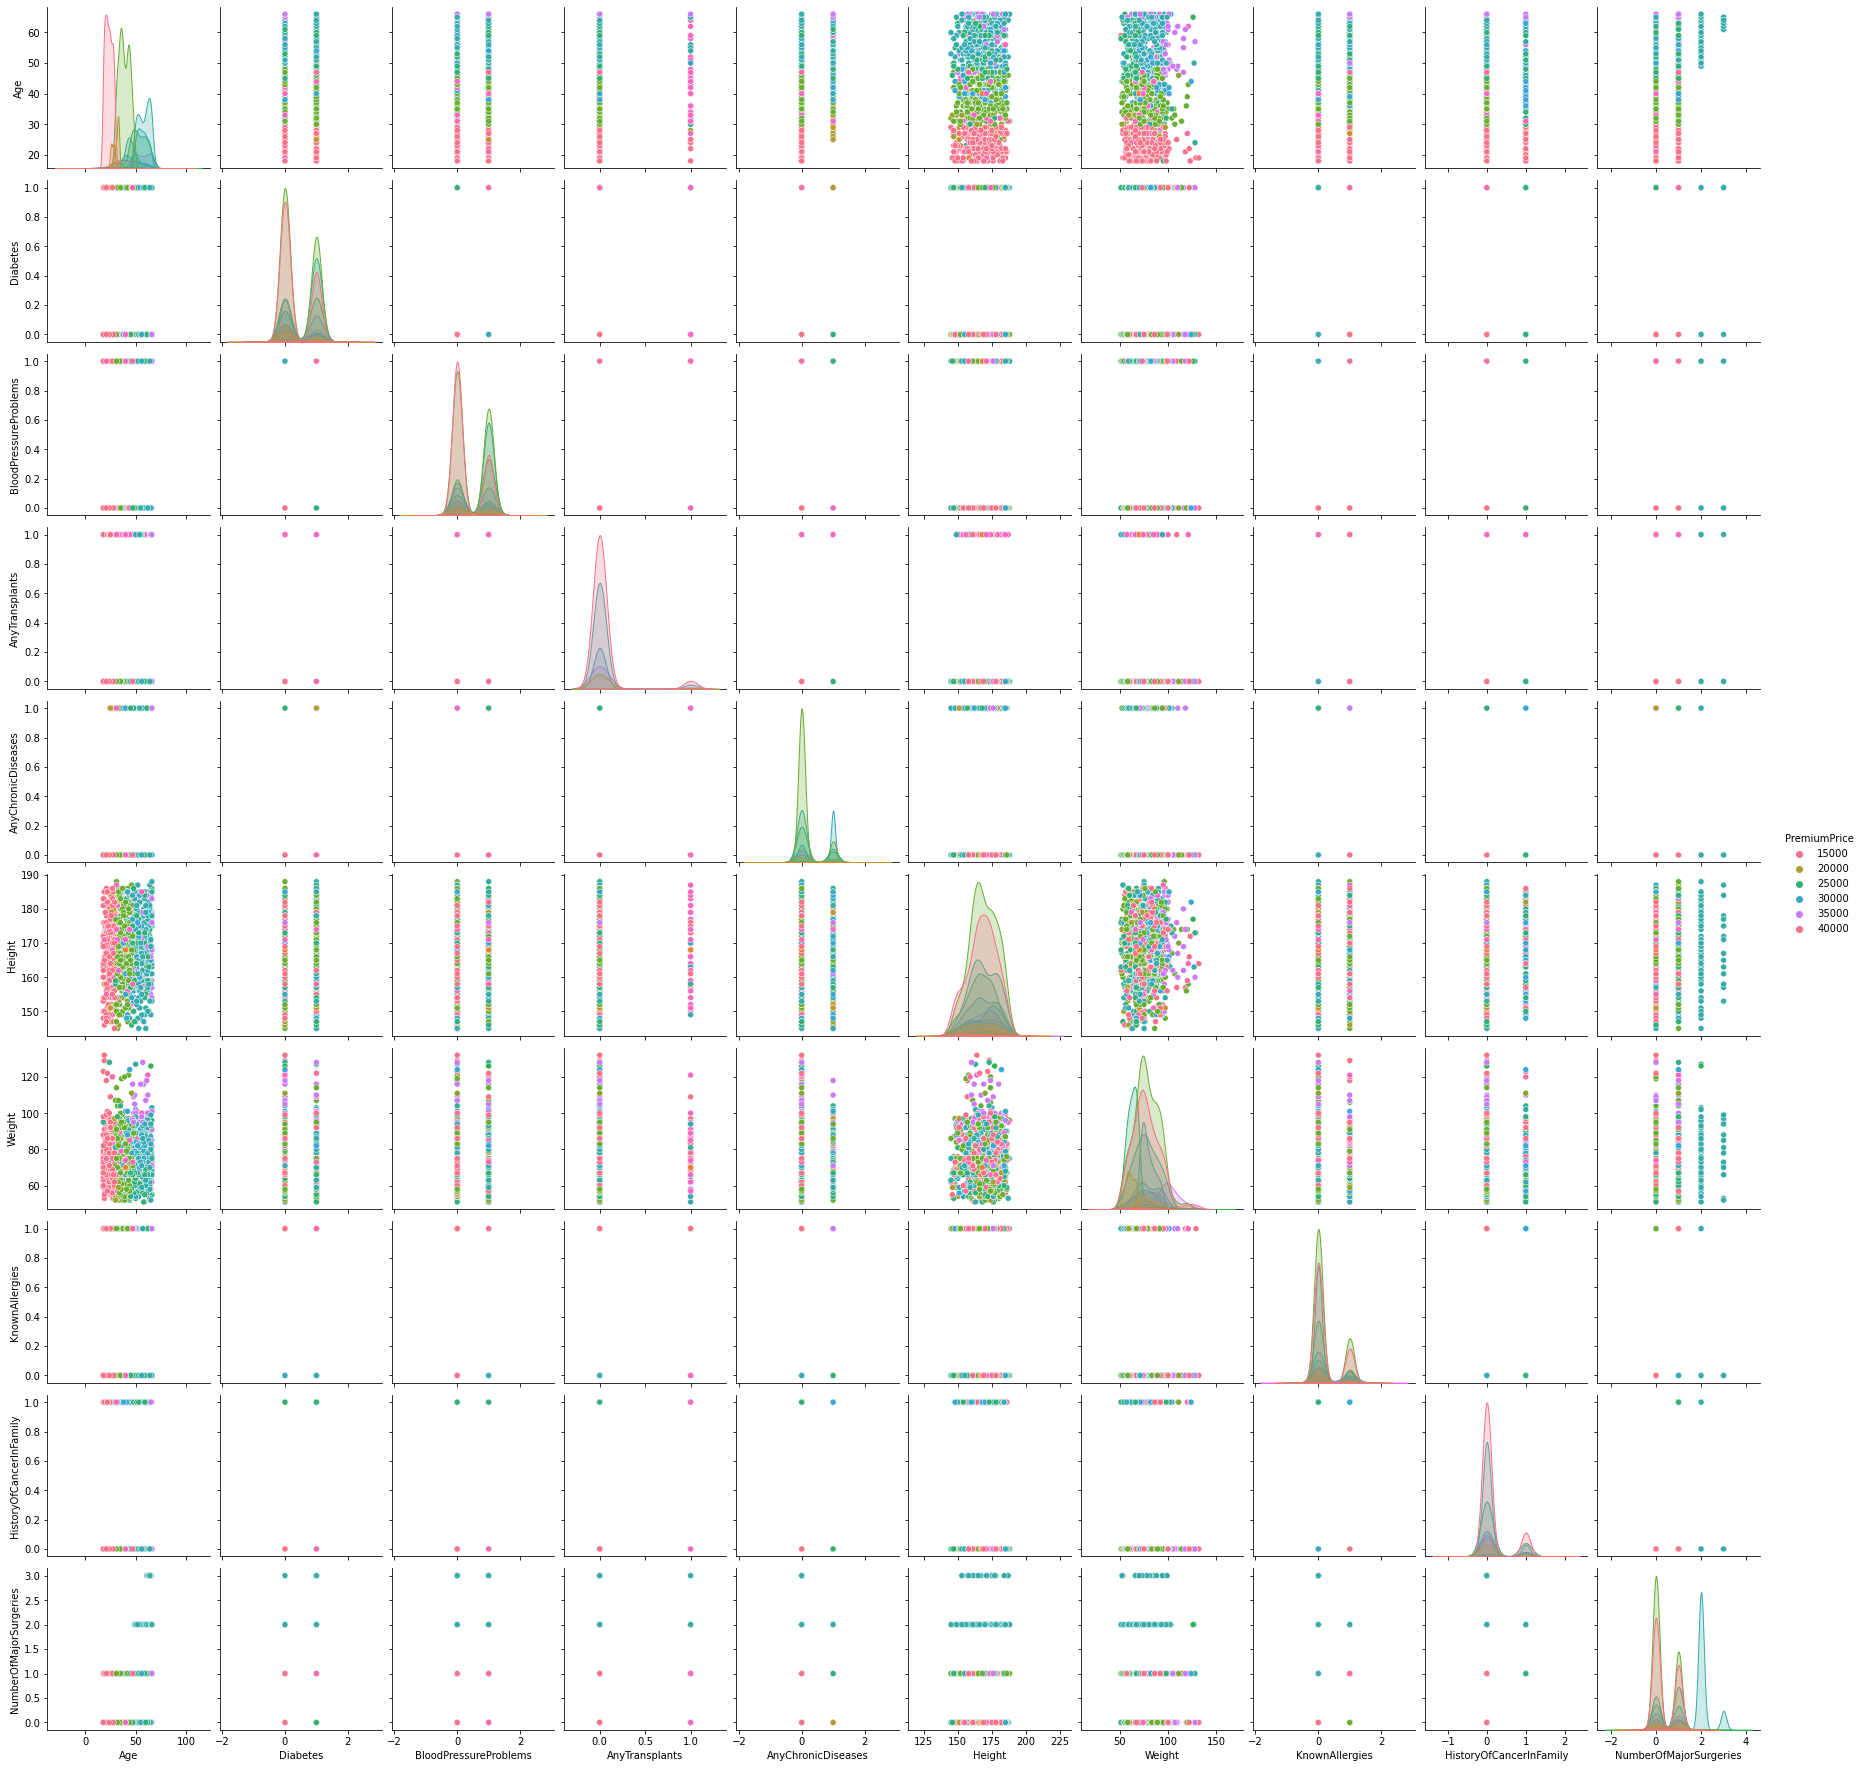

In [48]:
# Pair-Plot of the data

sns.pairplot(df, hue='PremiumPrice', kind='scatter', diag_kind='kde',
palette='husl')
plt.show()

In [92]:
# Segregating dependent and independent features

X = df.drop('PremiumPrice', axis=1)
Y = df.PremiumPrice

In [93]:
# Normalization of the data

scalar = StandardScaler()
X.Age = scalar.fit_transform(X[['Age']])
X.Height = scalar.fit_transform(X[['Height']])
X.Weight = scalar.fit_transform(X[['Weight']])

In [134]:
# Implementing ML models to predict outcome

models = {
    RandomForestRegressor(): 'Random Forest',
    GradientBoostingRegressor(): 'Boosting Regressor',
    LinearRegression(): 'Linear Regression',
    Lasso(): 'Lasso Regression',
    Ridge(): 'Ridge Regression'
}

In [145]:
# Implementing Boosting for regression

avgAccuracy = {
    'Random Forest': 0,
    'Boosting Regressor': 0,
    'Linear Regression': 0,
    'Lasso Regression': 0,
    'Ridge Regression': 0
}
    
for i in range(10):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=42)

    for j in models.keys():
        j.fit(Xtrain, Ytrain)
        
    for key, val in models.items():
        avgAccuracy[val] += key.score(Xtest, Ytest) / 10

In [146]:
# Printing average accuracy for each model

for key, val in avgAccuracy.items():
    print(f"Average accuracy Score for {key} is :", val * 100, "%")

Average accuracy Score for Random Forest is : 86.19939113918258 %
Average accuracy Score for Boosting Regressor is : 85.54552875205981 %
Average accuracy Score for Linear Regression is : 65.3538446715857 %
Average accuracy Score for Lasso Regression is : 65.33364078520708 %
Average accuracy Score for Ridge Regression is : 65.22573483717541 %


Text(0.5, 1.0, 'Visualizing Important Features')

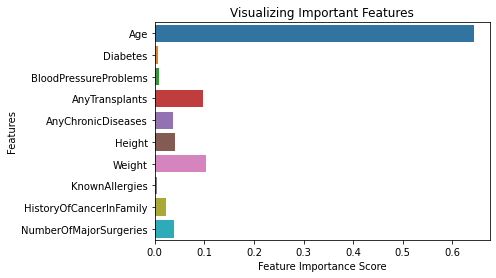

In [107]:
# Visualizing importance of each feature

rf = RandomForestRegressor()
rf.fit(Xtrain, Ytrain)
featureImp = rf.feature_importances_
sns.barplot(x=featureImp, y=X.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')

In [114]:
# Dataset of only top 5 attributes

X5 = df.drop(['PremiumPrice','Diabetes', 'BloodPressureProblems'
            ,'KnownAllergies', 'NumberOfMajorSurgeries'
            ,'HistoryOfCancerInFamily']
            , axis=1)
X5

,Age,AnyTransplants,AnyChronicDiseases,Height,Weight
0,45,0,0,155,57
1,60,0,0,180,73
2,36,0,0,158,59
3,52,0,1,183,93
4,38,0,1,166,88
...,...,...,...,...,...
981,18,0,0,169,67
982,64,0,0,153,70
983,56,0,0,155,71
984,47,0,0,158,73


In [141]:
# Implementing Boosting for regression on Dataset with 5 attributes

avgAccuracy5 = {
    'Random Forest': 0,
    'Boosting Regressor': 0,
    'Linear Regression': 0,
    'Lasso Regression': 0,
    'Ridge Regression': 0
}
    
for i in range(10):
    Xtrain5, Xtest5, Ytrain, Ytest = train_test_split(X5, Y, test_size=0.1, random_state=42)

    for j in models.keys():
        j.fit(Xtrain5, Ytrain)
        
    for key, val in models.items():
        avgAccuracy5[val] += key.score(Xtest5, Ytest) / 10

In [142]:
# Printing average accuracy for each model

for key, val in avgAccuracy5.items(): 
    print(f"Average accuracy Score for {key} is : ", val * 100, "%")

Average accuracy Score for Random Forest is :  83.80648904277155 %
Average accuracy Score for Boosting Regressor is :  76.90737232728026 %
Average accuracy Score for Linear Regression is :  63.71297485017576 %
Average accuracy Score for Lasso Regression is :  63.69207019887667 %
Average accuracy Score for Ridge Regression is :  63.56967249218356 %




### CONCLUSION


On training the models on our original dataset of 10 attributes, the models gave an accuracy of 86%, 85, 65%, 65% and 65% respectively.

after analysing the 4 most important attributes that have highest impact on our Insurance Premium and eliminating the remaining 6 not so important attributes, we would not expect our accuracy to go down by that much. 

The results were similar to our expectations, the accuracy of the models on the new dataset was 83%, 77%, 64%, 64% and 64% respectively.

There was an approximate 10% decrease in the accuracy of the models after eliminating the least contributing 6 attributes and this made the execution a lot simpler and faster.